In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [2]:
housevalue = fch()

In [3]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数", "房屋使用年代中位数", "平均房间数目"
    , "平均卧室数目", "街区人口", "平均入住率", "街区的纬度", "街区的经度"]

In [4]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

In [6]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [7]:
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain, Ytrain)

In [8]:
reg.score(Xtest, Ytest)

0.604361035231228

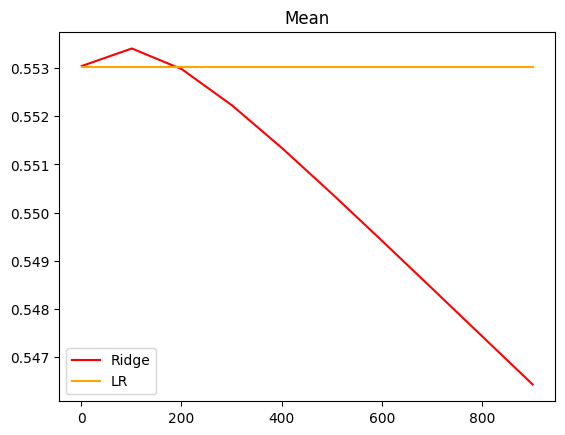

In [9]:
from sklearn.model_selection import cross_val_score

#交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").mean()
    linears = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange, ridge, color="red", label="Ridge")
plt.plot(alpharange, lr, color="orange", label="LR")
plt.title("Mean")
plt.legend()
plt.show()

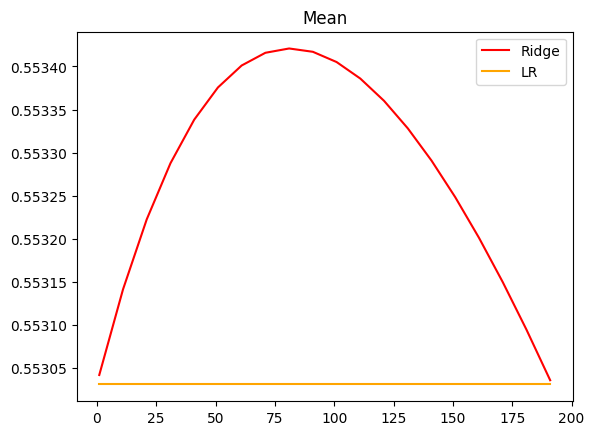

In [10]:
#细化一下学习曲线
alpharange = np.arange(1, 201, 10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").mean()
    linears = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange, ridge, color="red", label="Ridge")
plt.plot(alpharange, lr, color="orange", label="LR")
plt.title("Mean")
plt.legend()
plt.show()

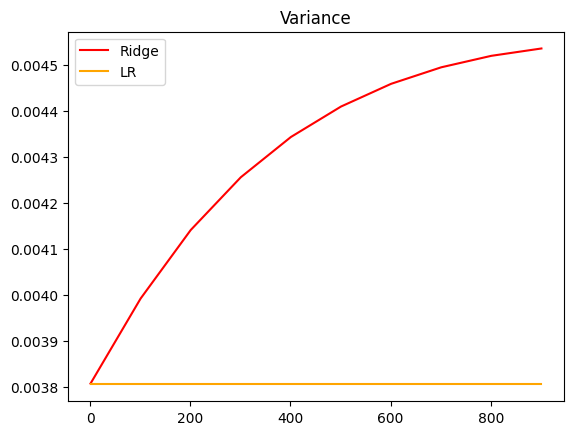

In [11]:
#模型方差如何变化？
alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg, X, y, cv=5, scoring="r2").var()
    varLR = cross_val_score(linear, X, y, cv=5, scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange, ridge, color="red", label="Ridge")
plt.plot(alpharange, lr, color="orange", label="LR")
plt.title("Variance")
plt.legend()
plt.show()

In [12]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [13]:
from sklearn.model_selection import cross_val_score

X = data
y = target
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

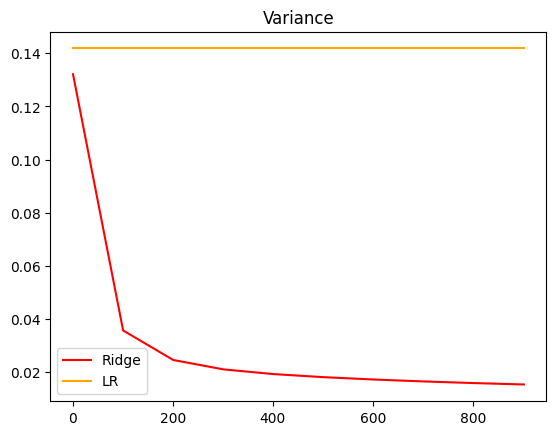

In [14]:
#先查看方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

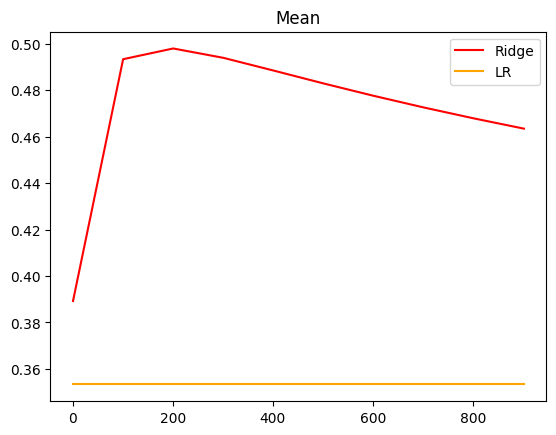

In [15]:
#查看R2的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

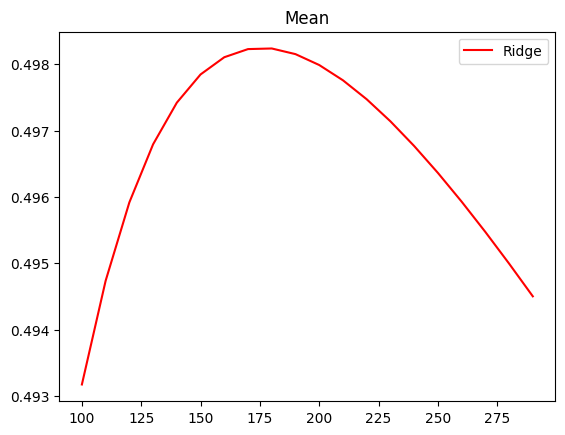

In [16]:
#细化学习曲线
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()